In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import seaborn as sns
sns.set()
import matplotlib.pyplot as plt
import os

In [2]:
data = pd.read_csv("Iris.csv",index_col='Id')

In [3]:
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,Iris-setosa
2,4.9,3.0,1.4,0.2,Iris-setosa
3,4.7,3.2,1.3,0.2,Iris-setosa
4,4.6,3.1,1.5,0.2,Iris-setosa
5,5.0,3.6,1.4,0.2,Iris-setosa
6,5.4,3.9,1.7,0.4,Iris-setosa
7,4.6,3.4,1.4,0.3,Iris-setosa
8,5.0,3.4,1.5,0.2,Iris-setosa
9,4.4,2.9,1.4,0.2,Iris-setosa


### Univariate EDA

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 150 entries, 1 to 150
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 7.0+ KB


In [5]:
data.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [6]:
## Label encoding since the algorithms we are going to use do not take non numerical or boolean data as inputs
data.Species.replace({'Iris-setosa':0,'Iris-versicolor':1, 'Iris-virginica':2},inplace=True)

In [7]:
data.head(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
1,5.1,3.5,1.4,0.2,0
2,4.9,3.0,1.4,0.2,0
3,4.7,3.2,1.3,0.2,0
4,4.6,3.1,1.5,0.2,0
5,5.0,3.6,1.4,0.2,0
6,5.4,3.9,1.7,0.4,0
7,4.6,3.4,1.4,0.3,0
8,5.0,3.4,1.5,0.2,0
9,4.4,2.9,1.4,0.2,0


In [8]:
data.tail(10)

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
Id,,,,,
141,6.7,3.1,5.6,2.4,2
142,6.9,3.1,5.1,2.3,2
143,5.8,2.7,5.1,1.9,2
144,6.8,3.2,5.9,2.3,2
145,6.7,3.3,5.7,2.5,2
146,6.7,3.0,5.2,2.3,2
147,6.3,2.5,5.0,1.9,2
148,6.5,3.0,5.2,2.0,2
149,6.2,3.4,5.4,2.3,2


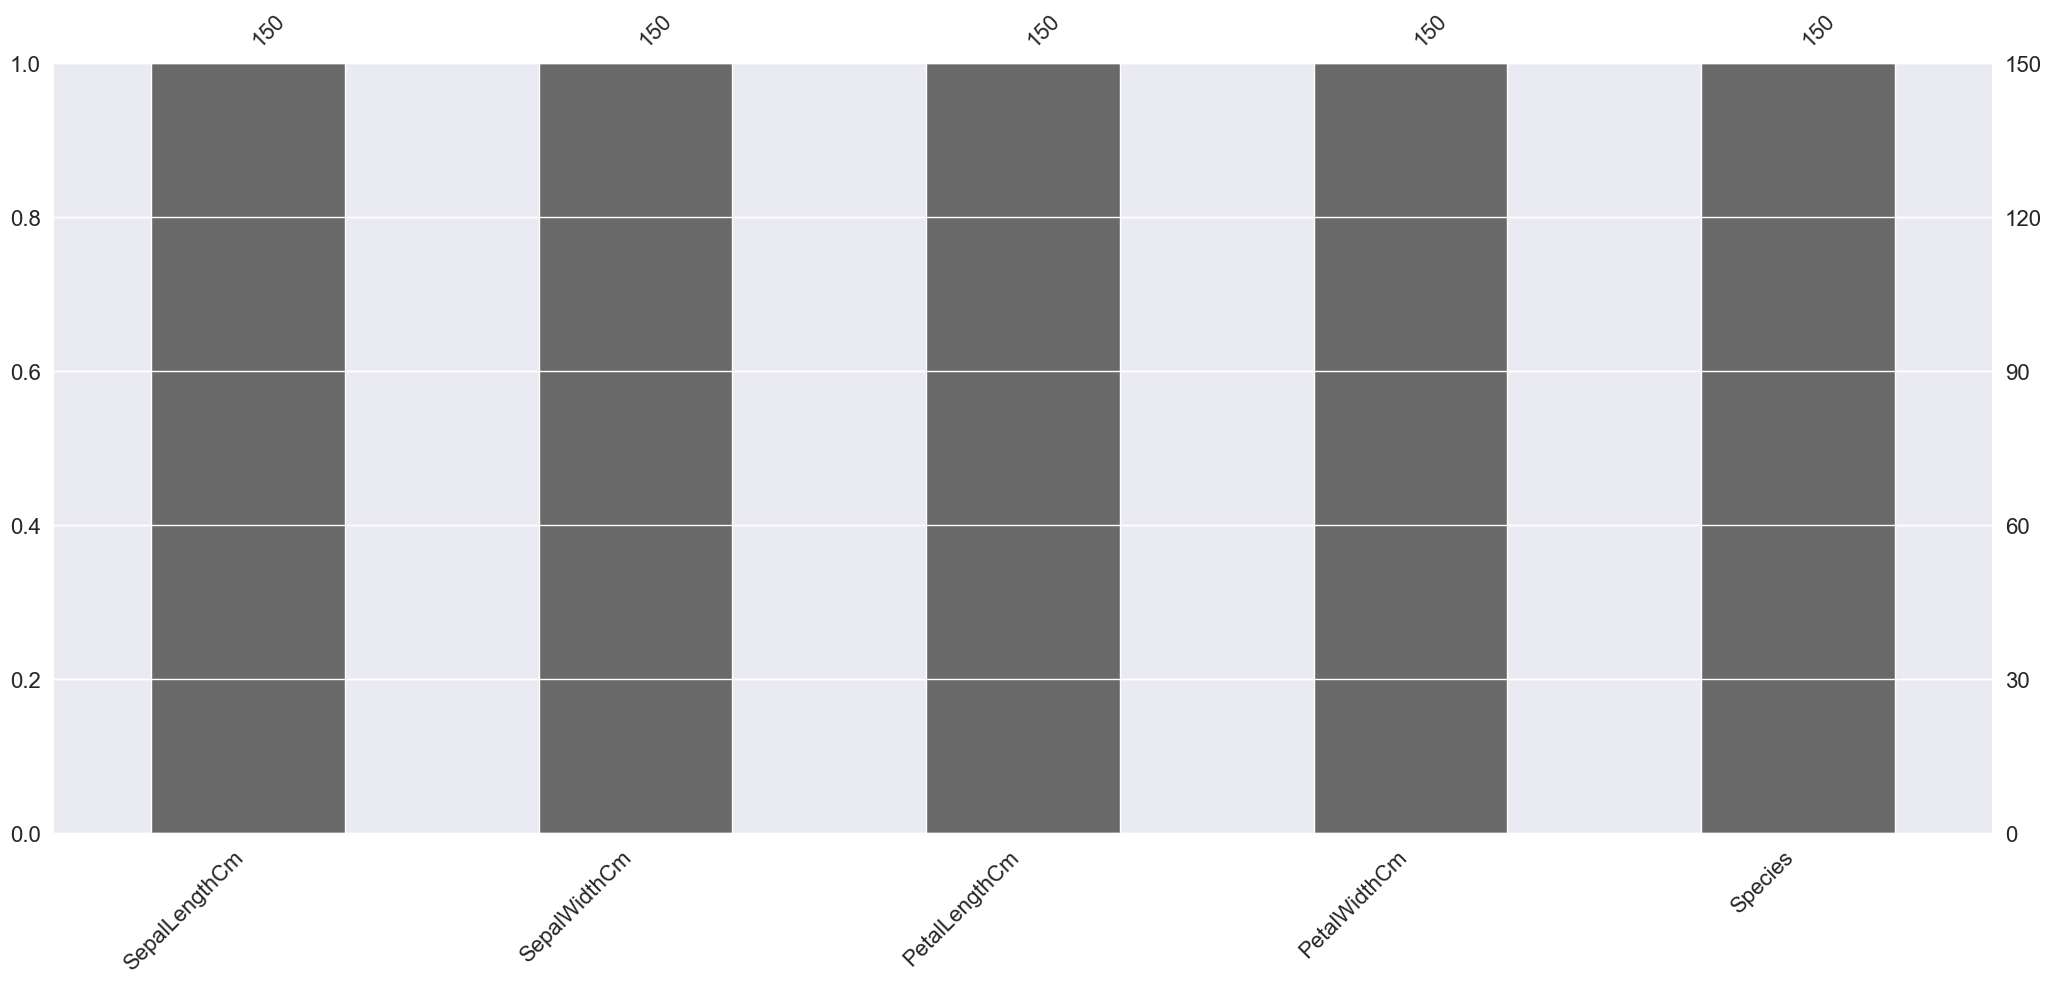

In [9]:
## null count analysis before modelling to keep check
import missingno as msno
p=msno.bar(data)

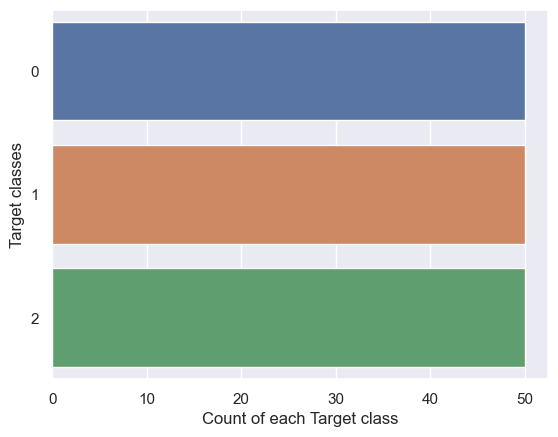

In [10]:
sns.countplot(y=data.Species ,data=data)
plt.xlabel("Count of each Target class")
plt.ylabel("Target classes")
plt.show()

#### Early Insights : 
1. 150 rows
2. 4 Independent variables to act as factors
3. All have same units of measurement (cm)
4. No missing data
5. Three unique target classes namely : 'Iris-setosa', 'Iris-versicolor' and 'Iris-virginica'
6. No class imbalance, all target classes have equal number of rows (50 each).

### Now some deeper explorations!

# Bivariate EDA

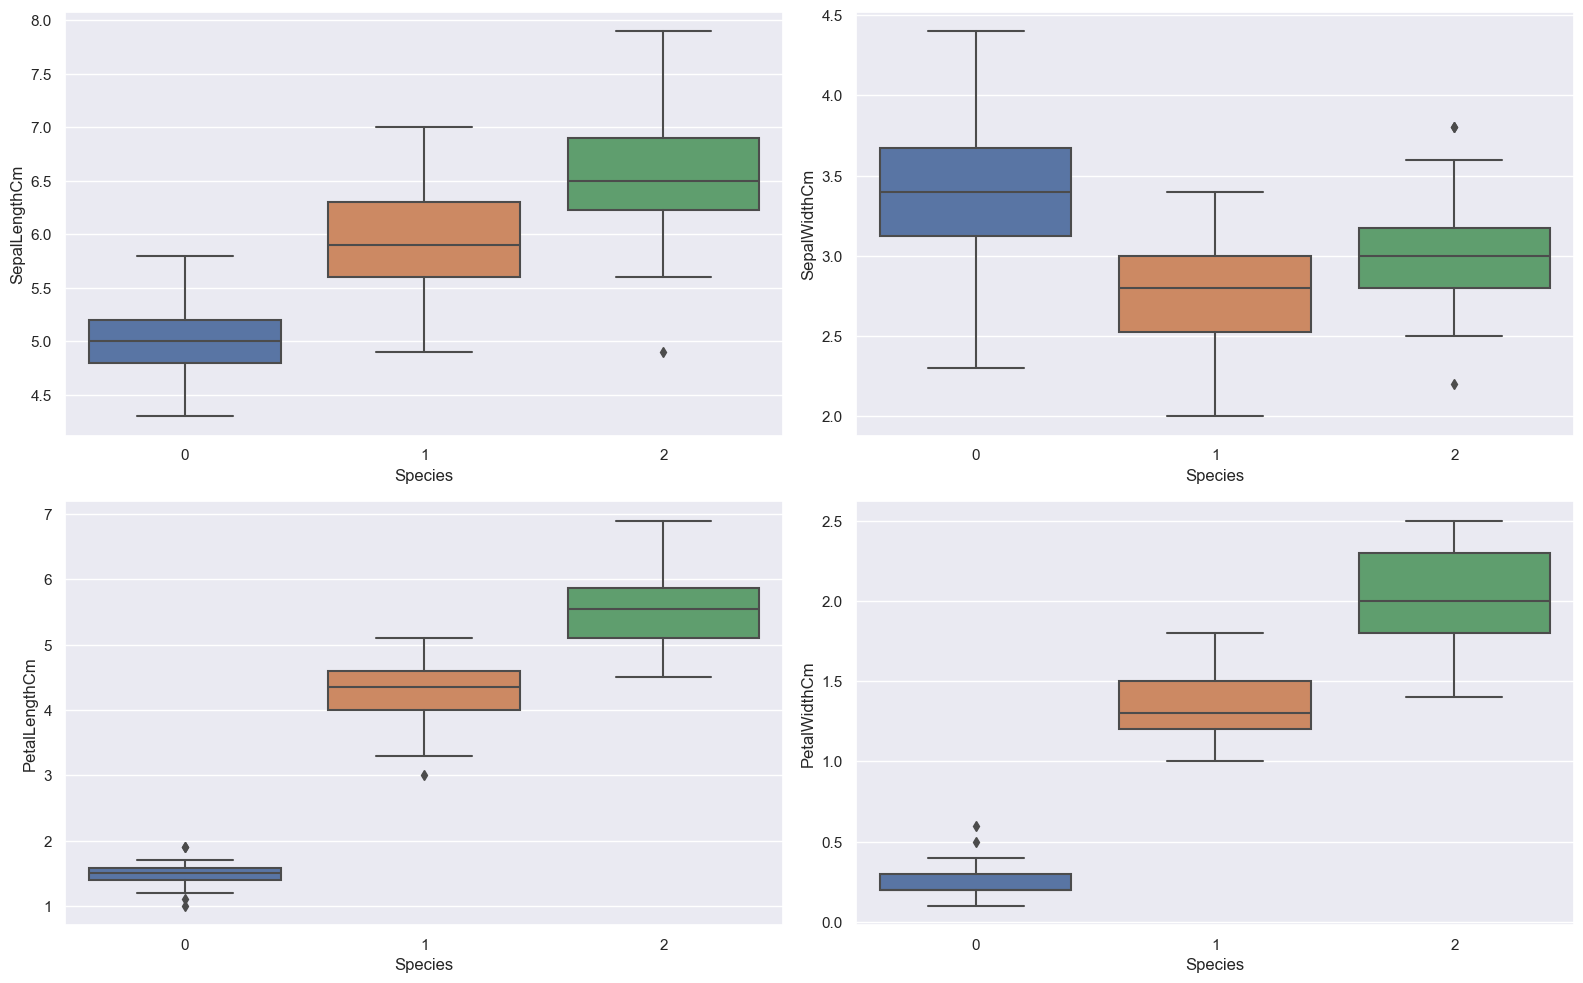

In [11]:
fig,ax = plt.subplots(nrows = 2, ncols=2, figsize=(16,10))
row = 0
col = 0
for i in range(len(data.columns) -1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row,col]
    sns.boxplot(x = data['Species'], y = data[data.columns[i]],ax = axes)
    col += 1
plt.tight_layout()
# plt.title("Individual Features by Class")
plt.show()

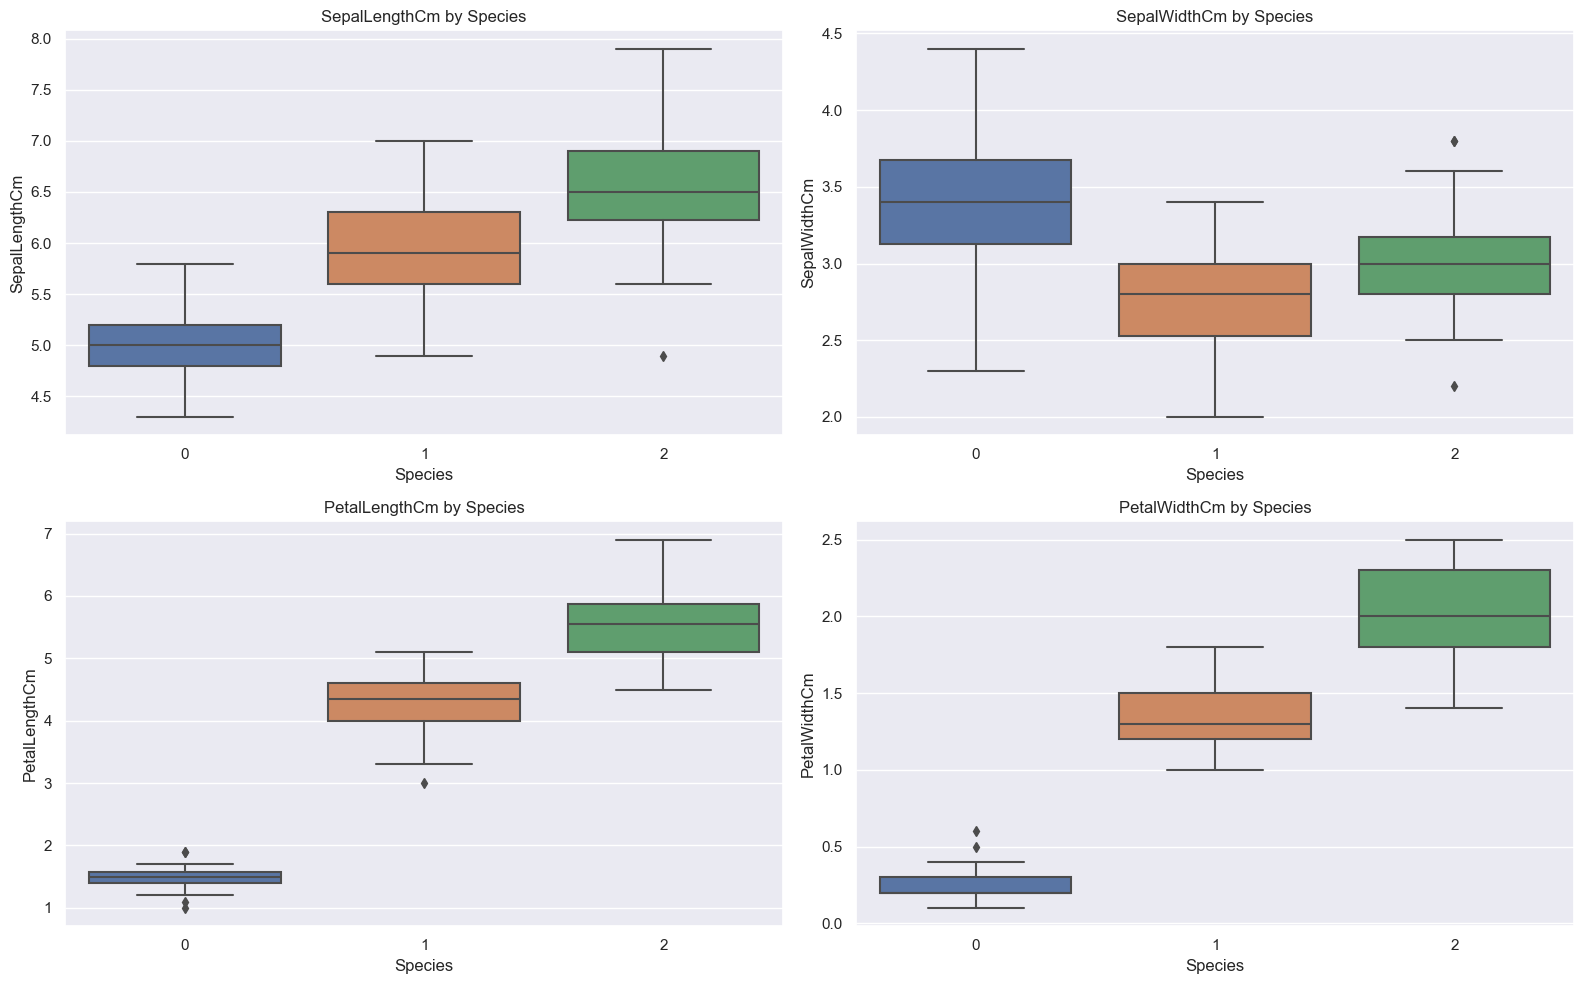

In [12]:

fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(16, 10))
row = 0
col = 0

for i in range(len(data.columns) - 1):
    if col > 1:
        row += 1
        col = 0
    axes = ax[row, col]
    
    sns.boxplot(x=data['Species'], y=data[data.columns[i]], ax=axes)
    
    # Set title for each subplot
    axes.set_title(f"{data.columns[i]} by Species")
    
    col += 1

plt.tight_layout()
plt.show()

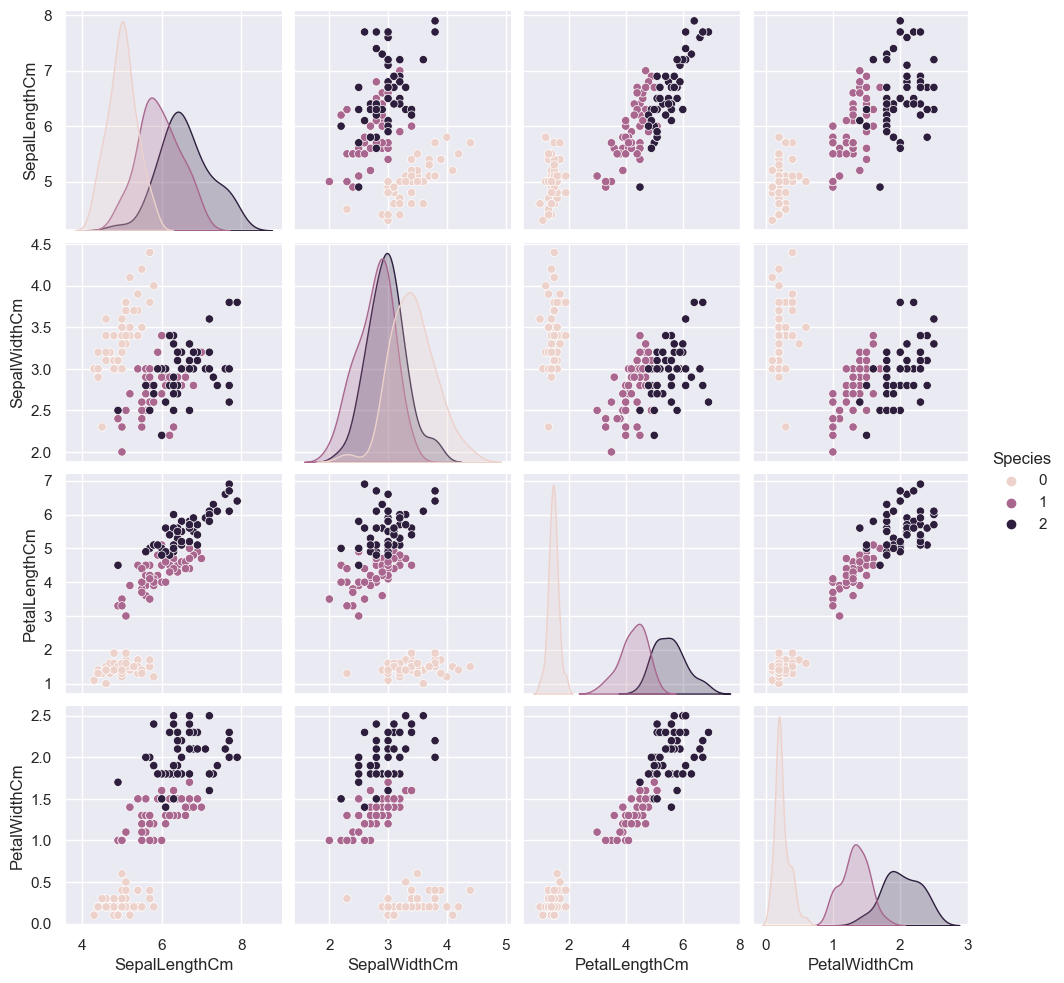

In [13]:
sns.pairplot(data, hue='Species')
plt.show()


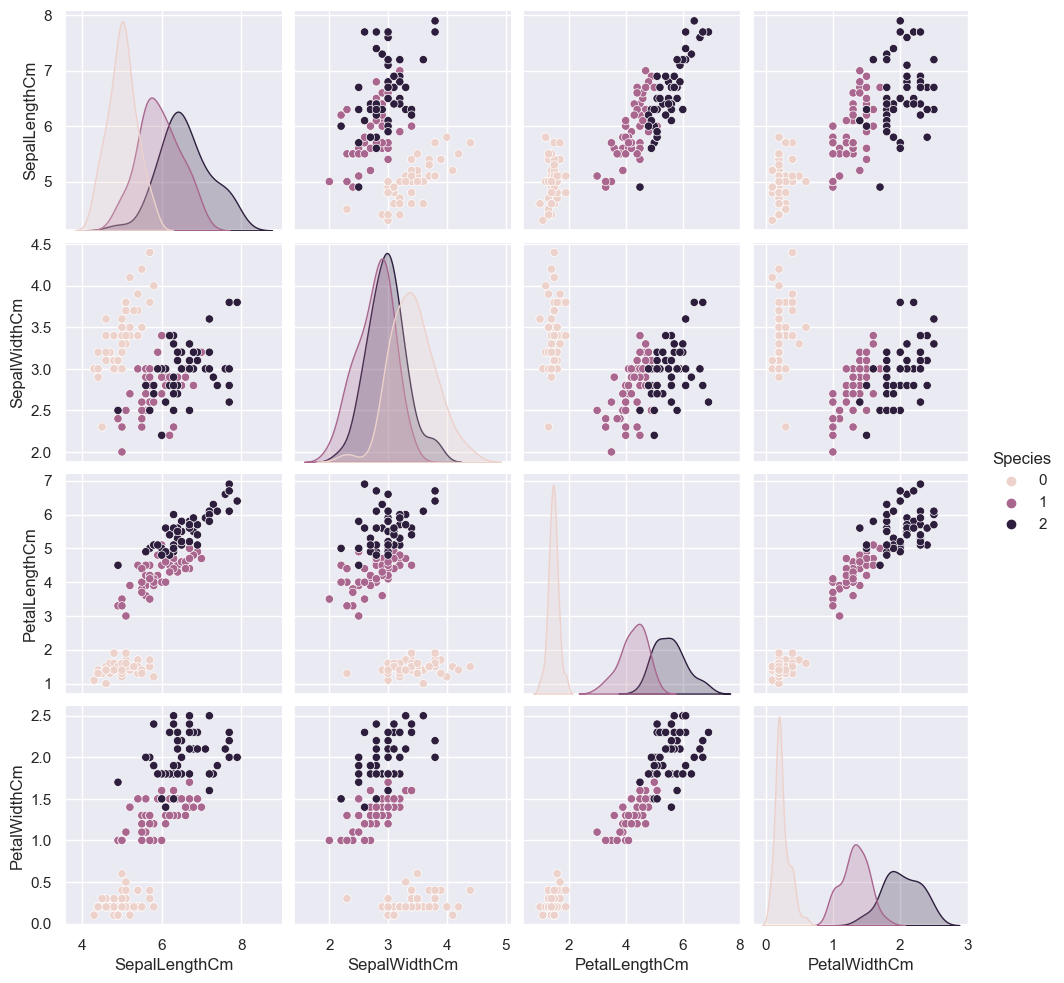

In [14]:
p=sns.pairplot(data, hue = 'Species')

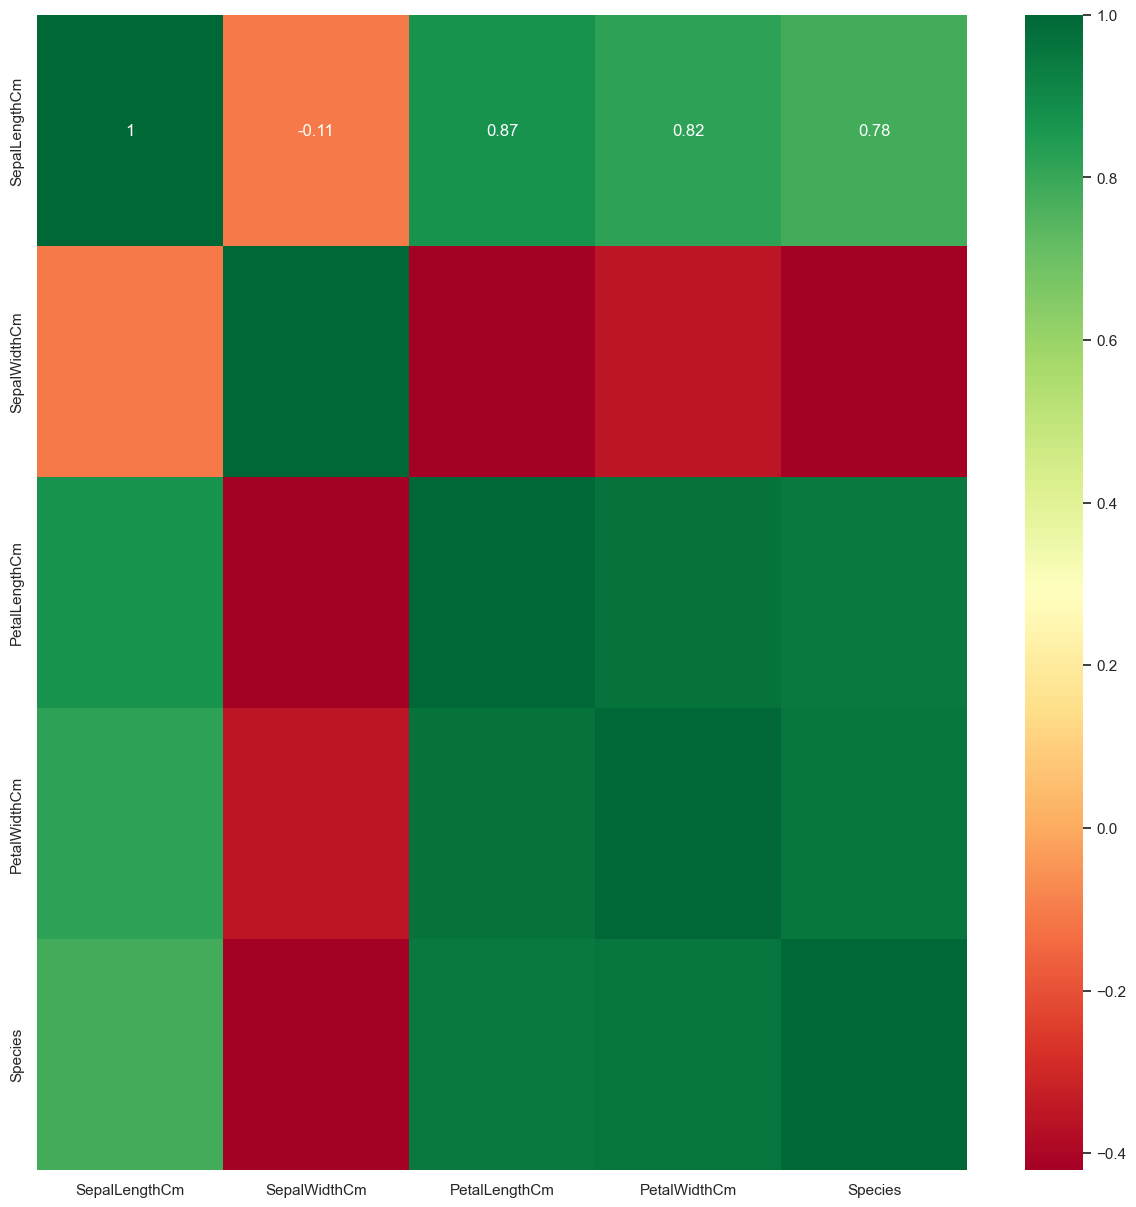

In [15]:
plt.figure(figsize=(15,15))
p=sns.heatmap(data.corr(), annot=True,cmap='RdYlGn') 

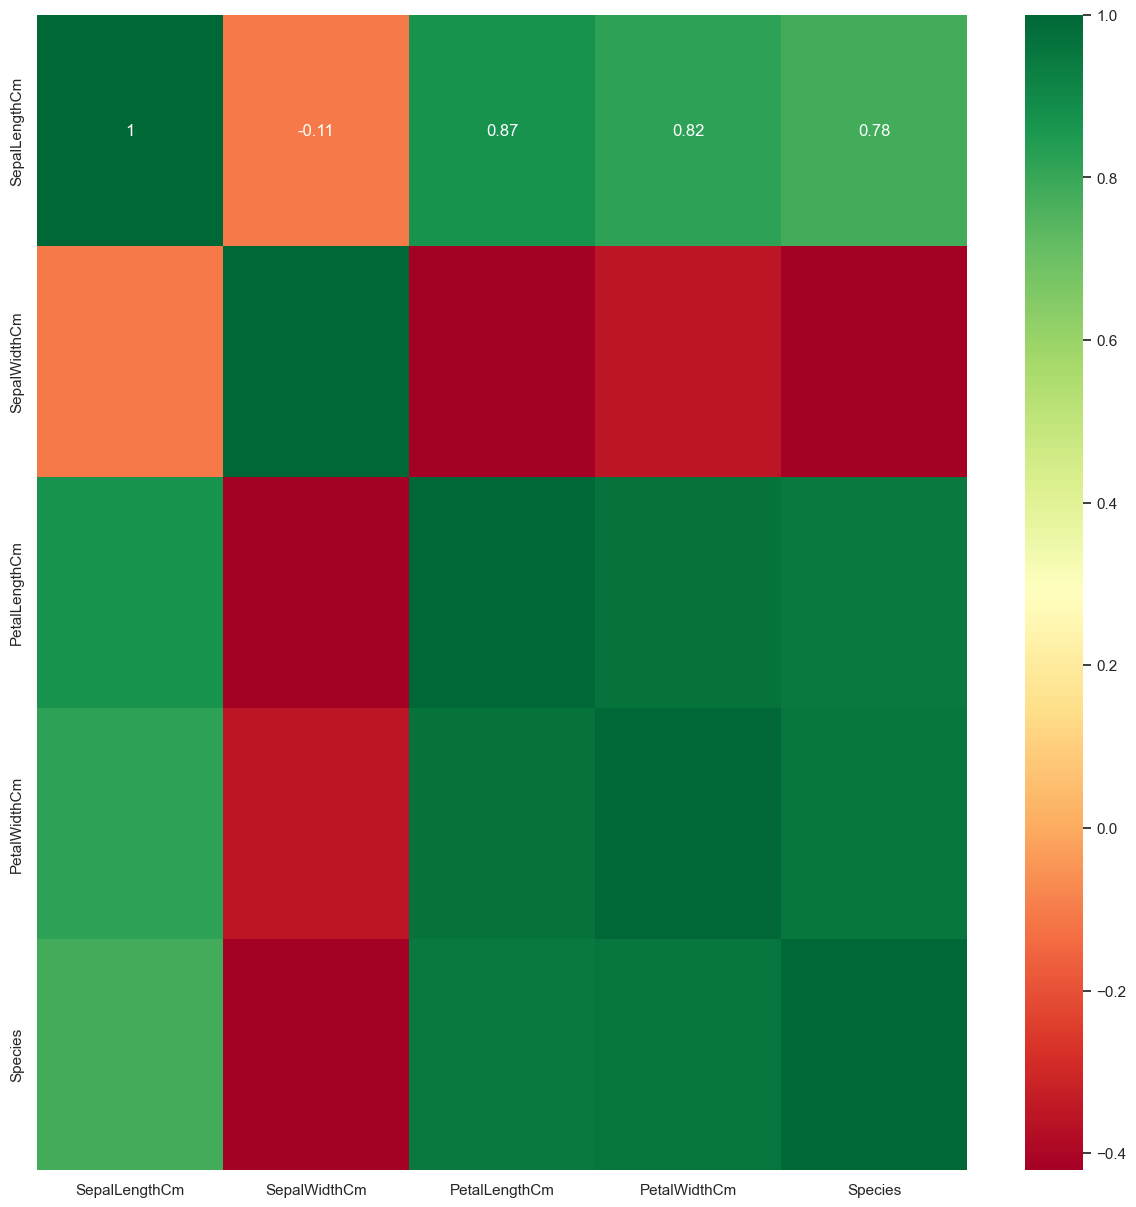

In [16]:
# Set the size of the figure
plt.figure(figsize=(15, 15))

# Create a heatmap of the correlation matrix
p = sns.heatmap(data.corr(), annot=True, cmap='RdYlGn')

# Display the plot
plt.show()

### One of the biggest aims of these sort of plots and EDAs are to identify features that are not much helpful in explaining the target outcome. The SepalWidthCm feature seems to be less relevant in explaining the target class as compared to the other features

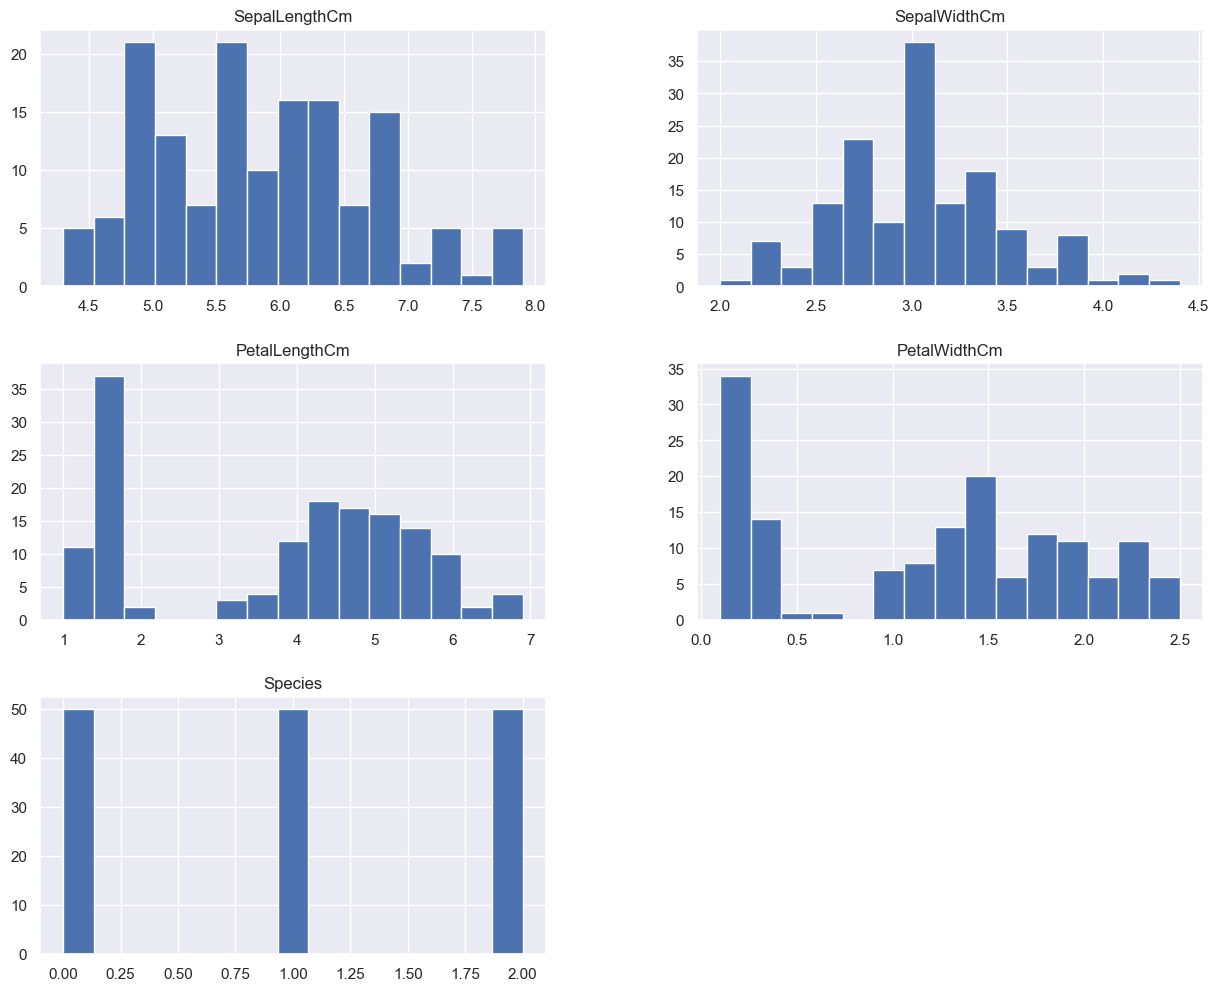

In [17]:
data.hist(figsize=(15,12),bins = 15)
plt.title("Features Distribution")
plt.show()

#### The  histogram distributions don't seem to be ideal.

# Modelling

# 1. Without PCA

In [18]:
X = data.drop(['Species'],axis=1)
y = data.Species

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X=scaler.fit_transform(X)

In [20]:
X

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667],
       [0.19444444, 0.66666667, 0.06779661, 0.04166667],
       [0.30555556, 0.79166667, 0.11864407, 0.125     ],
       [0.08333333, 0.58333333, 0.06779661, 0.08333333],
       [0.19444444, 0.58333333, 0.08474576, 0.04166667],
       [0.02777778, 0.375     , 0.06779661, 0.04166667],
       [0.16666667, 0.45833333, 0.08474576, 0.        ],
       [0.30555556, 0.70833333, 0.08474576, 0.04166667],
       [0.13888889, 0.58333333, 0.10169492, 0.04166667],
       [0.13888889, 0.41666667, 0.06779661, 0.        ],
       [0.        , 0.41666667, 0.01694915, 0.        ],
       [0.41666667, 0.83333333, 0.03389831, 0.04166667],
       [0.38888889, 1.        , 0.08474576, 0.125     ],
       [0.30555556, 0.79166667, 0.05084746, 0.125     ],
       [0.22222222, 0.625     ,

In [21]:
y

Id
1      0
2      0
3      0
4      0
5      0
      ..
146    2
147    2
148    2
149    2
150    2
Name: Species, Length: 150, dtype: int64

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state=20, stratify=y)

In [23]:
knn = KNeighborsClassifier(8)
knn.fit(X_train,y_train)
print("Train score before PCA",knn.score(X_train,y_train),"%")
print("Test score before PCA",knn.score(X_test,y_test),"%")

Train score before PCA 0.9619047619047619 %
Test score before PCA 0.9777777777777777 %


# 2. With PCA

In [24]:
from sklearn.decomposition import PCA
pca = PCA()
X_new = pca.fit_transform(X)

In [25]:
pca.get_covariance()

array([[ 0.05290845, -0.00454496,  0.05996621,  0.05982683],
       [-0.00454496,  0.03263959, -0.02271983, -0.02048285],
       [ 0.05996621, -0.02271983,  0.08943348,  0.09155279],
       [ 0.05982683, -0.02048285,  0.09155279,  0.1011136 ]])

In [26]:
explained_variance=pca.explained_variance_ratio_
explained_variance

array([0.84141901, 0.11732474, 0.03490564, 0.00635061])

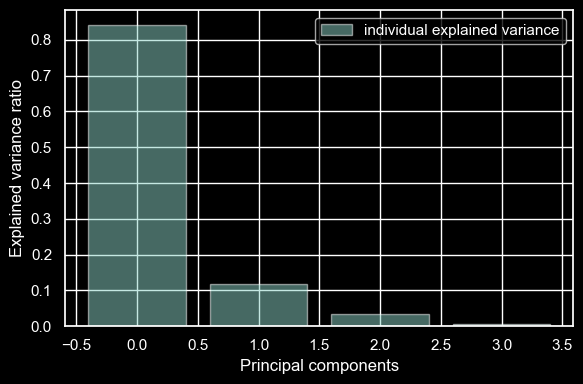

In [27]:
with plt.style.context('dark_background'):
    plt.figure(figsize=(6, 4))

    plt.bar(range(4), explained_variance, alpha=0.5, align='center',
            label='individual explained variance')
    plt.ylabel('Explained variance ratio')
    plt.xlabel('Principal components')
    plt.legend(loc='best')
    plt.tight_layout()

In [28]:
pca=PCA(n_components=3)
X_new=pca.fit_transform(X)

In [29]:
X_train_new, X_test_new, y_train, y_test = train_test_split(X_new, y, test_size = 0.3, random_state=20, stratify=y)

In [30]:
knn_pca = KNeighborsClassifier(8)
knn_pca.fit(X_train_new,y_train)
print("Train score after PCA",knn_pca.score(X_train_new,y_train),"%")
print("Test score after PCA",knn_pca.score(X_test_new,y_test),"%")

Train score after PCA 0.9809523809523809 %
Test score after PCA 0.9777777777777777 %


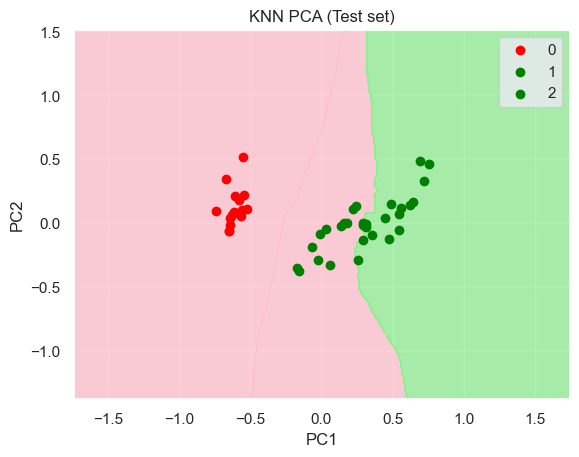

In [31]:
# Visualising the Test set results
classifier = knn_pca
from matplotlib.colors import ListedColormap
X_set, y_set = X_test_new, y_test
X1, X2 = np.meshgrid(np.arange(start = X_set[:, 0].min() - 1, stop = X_set[:, 0].max() + 1, step = 0.01),
                     np.arange(start = X_set[:, 1].min() - 1, stop = X_set[:, 1].max() + 1, step = 0.01))
plt.contourf(X1, X2, classifier.predict(np.array([X1.ravel(), X2.ravel(),np.zeros((X1.shape[0],X1.shape[1])).ravel()]).T).reshape(X1.shape),
             alpha = 0.75, cmap = ListedColormap(('pink', 'lightgreen')))
plt.xlim(X1.min(), X1.max())
plt.ylim(X2.min(), X2.max())

# Plotting the data points
for i, j in enumerate(np.unique(y_set)):
    plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                color=ListedColormap(('red', 'green'))(i), label=j)
plt.title('KNN PCA (Test set)')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.legend()
plt.show()